1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [24]:
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [35]:
# se leen los datos del archivo
df = pd.read_csv('..\data\iris.csv', sep=',')

X = np.array(df.drop(['variety'], axis=1))
y = np.array(df['variety'])

# se genera el objeto de codificación y se codifica la variable target
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y)

# se distribuyen los valores en conjuntos de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20)

# Se genera las instancias de modelos Knn para 3 vecinos y para 7 vecinos
modelKnn3 = KNeighborsClassifier(n_neighbors=3)
modelKnn7 = KNeighborsClassifier(n_neighbors=7)

# Entrenamiento de los modelos k3 y k7
modelKnn3.fit(X_train, y_train)
modelKnn7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [57]:
# predicción puntual para dos valores [15.7,2.8,9.5,0.1] y [1.7,3.8,4.5,11.3]
y3_pred1 = modelKnn3.predict([[15.7,2.8,9.5,0.1]])
y3_pred2 = modelKnn3.predict([[1.7,3.8,4.5,11.3]])
print(le.inverse_transform(y3_pred1))
print(le.inverse_transform(y3_pred2))

# evaluación del modelo knn3
print("Score:", modelKnn3.score(X, y_encoded))
y_pred3 = modelKnn3.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred3))

['Virginica']
['Virginica']
Score: 0.96
Accuracy: 1.0


In [58]:
# predicción puntual para dos valores [15.7,2.8,9.5,0.1] y [1.7,3.8,4.5,11.3]
y7_pred1 = modelKnn7.predict([[15.7,2.8,9.5,0.1]])
y7_pred2 = modelKnn7.predict([[1.7,3.8,4.5,11.3]])
print(le.inverse_transform(y7_pred1))
print(le.inverse_transform(y7_pred2))

# evaluación del modelo knn7
print("Score:", modelKnn7.score(X, y_encoded))
y_pred7 = modelKnn7.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred7))

['Virginica']
['Virginica']
Score: 0.9733333333333334
Accuracy: 1.0


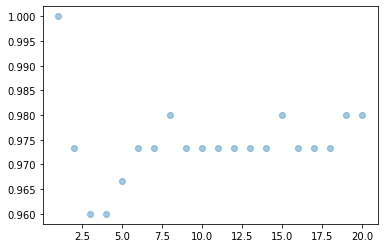

In [61]:
#Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
import matplotlib.pyplot as plt

results = {}
for i in range(20):
    Knni = KNeighborsClassifier(n_neighbors=i+1)
    Knni.fit(X_train, y_train)
    results[i+1]=Knni.score(X, y_encoded)

plt.scatter(results.keys(), results.values(), alpha=0.4)

el mejor acierto lo tiene el k=1, pero esto se puede deber a que los datos del target vienen ordenados

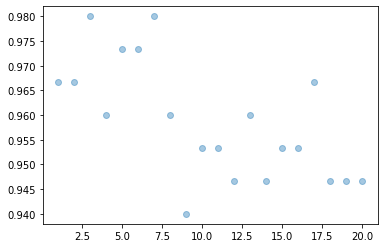

In [62]:
# Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
# se distribuyen los valores en conjuntos de entrenamiento y de test con el nuevo porcentaje 
X_train60, X_test60, y_train60, y_test60 = train_test_split(X, y_encoded, test_size=0.60)
results60 = {}
for i in range(20):
    Knni60 = KNeighborsClassifier(n_neighbors=i+1)
    Knni60.fit(X_train60, y_train60)
    results60[i+1]=Knni60.score(X, y_encoded)

plt.scatter(results60.keys(), results60.values(), alpha=0.4)

Los resultados cambian ya que al haber menos datos en el conjunto de train, el entrenamiento es peor

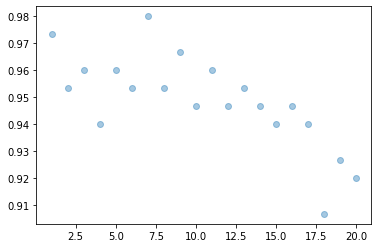

In [65]:
#Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
df2 = df[df['variety'] != 'Setosa']
X2 = np.array(df.drop(['variety'], axis=1))
y2 = np.array(df['variety'])
y2_encoded = le.fit_transform(y2)

# se distribuyen los valores en conjuntos de entrenamiento y de test con el nuevo porcentaje 
X_train602, X_test602, y_train602, y_test602 = train_test_split(X, y_encoded, test_size=0.602)
results602 = {}
for i in range(20):
    Knni602 = KNeighborsClassifier(n_neighbors=i+1)
    Knni602.fit(X_train602, y_train602)
    results602[i+1]=Knni602.score(X, y_encoded)

plt.scatter(results602.keys(), results602.values(), alpha=0.4)

Los resultados mejoran con respecto al conjunnto anterior ya que al haber solo dos clases, el modelo puede reconocer patrones más fácilmente pese a tener una menor base sobre la que entrenarse.

¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

Si, Knn es un buen algoritmo para estos casos ya que el porcentaje de acierto en el peor de los casos es superior al 90%, pero es fácilmente configurable para obtener siempre porcentajes superiores al 95%.